<a href="https://colab.research.google.com/github/adhang/learn-tensorflow/blob/main/NLP_IMBD_Reviews_(LSTM_GRU_Conv1D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - IMDB Reviews with LSTM, GRU, and Conv1D

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

In this project, I will use full word encoding

# Libraires & Variables

In [1]:
import numpy as np
import json
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

In [2]:
vocab_size = 10000
oov_tok = '<OOV>'

max_length = 120
trunc_type ='post'
padding_type ='post'

# Download and Setup Data

In [3]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

data_train, data_test = imdb['train'], imdb['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXQO5JA/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXQO5JA/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXQO5JA/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
training_sentences = list()
testing_sentences = list()
training_labels = list()
testing_labels = list()

for s, l in data_train:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s, l in data_test:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

# Tokenizer

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# num_words = num of vocab that we allow
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# Sequences, Padding, Truncating

In [6]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,
                                padding=padding_type, truncating=trunc_type,
                                maxlen=max_length)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,
                               padding=padding_type, truncating=trunc_type,
                               maxlen=max_length)

In [7]:
# convert to numpy
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Visualization Function

In [19]:
def plot_history(history, metrics='loss', val_metrics='val_loss', 
                 ax=None, show=True, **kwargs):
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))

  epochs = range(1, len(history.history[metrics])+1)

  sns.lineplot(x=epochs, y=history.history[metrics],
               label=f'training {metrics}', ax=ax, **kwargs)
  sns.lineplot(x=epochs, y=history.history[val_metrics], 
               label=f'validation {metrics}', ax=ax, **kwargs)

  ax.set_ylabel(metrics)
  ax.set_xlabel('epochs')
  ax.set_xlim(1, len(epochs))

  ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

  sns.despine()
  if show:
    plt.show()

# Model with Flatten

## Create Model

In [8]:
embedding_dim = 16

model = tf.keras.Sequential([
                             layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             layers.Flatten(),
                             layers.Dense(32, activation='relu'),
                             layers.Dense(1, activation='sigmoid')
])

## Compile

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

## Fit

In [10]:
num_epochs = 10
batch_size = 128

history = model.fit(
    training_padded, training_labels,
    epochs=num_epochs, validation_data=(testing_padded, testing_labels),
    verbose=1
)

Epoch 1/10
782/782 [==============================] - 9s 6ms/step - loss: 0.4611 - accuracy: 0.7668 - val_loss: 0.3980 - val_accuracy: 0.8194
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2082 - accuracy: 0.9223 - val_loss: 0.4659 - val_accuracy: 0.8049
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0509 - accuracy: 0.9872 - val_loss: 0.6311 - val_accuracy: 0.7940
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0082 - accuracy: 0.9993 - val_loss: 0.7479 - val_accuracy: 0.7996
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.8317 - val_accuracy: 0.8000
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 5.3990e-04 - accuracy: 1.0000 - val_loss: 0.8743 - val_accuracy: 0.8022
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 2.7131e-04 - accuracy: 1.0000 - val_loss: 0.9181 - val_accuracy: 0.803

## History

It's clearly overfitting, but I will keep it as it is (at least for now)

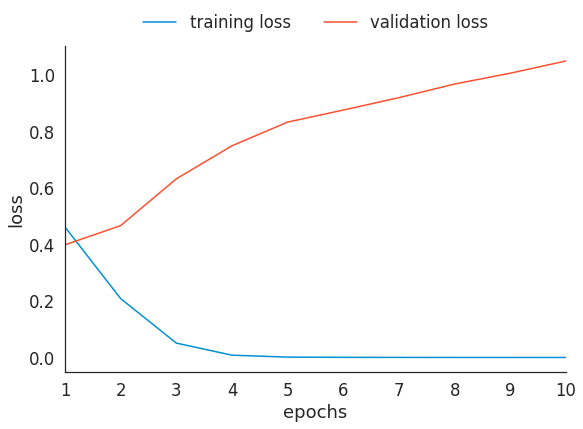

In [20]:
plot_history(history, metrics='loss', val_metrics='val_loss')

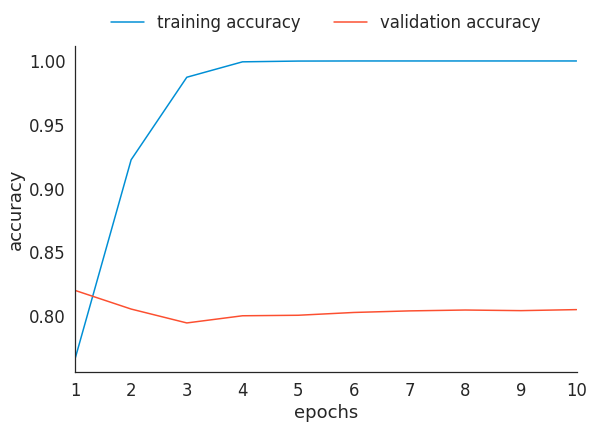

In [21]:
plot_history(history, metrics='accuracy', val_metrics='val_accuracy')

# Model with LSTM

## Create Model

In [22]:
embedding_dim = 16
lstm_dim = 32

model = tf.keras.Sequential([
                             layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
                             layers.Dense(32, activation='relu'),
                             layers.Dense(1, activation='sigmoid')
])

## Compile

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

## Fit

In [24]:
num_epochs = 10
batch_size = 128

history = model.fit(
    training_padded, training_labels,
    epochs=num_epochs, validation_data=(testing_padded, testing_labels),
    verbose=1
)

Epoch 1/10
782/782 [==============================] - 21s 20ms/step - loss: 0.4704 - accuracy: 0.7621 - val_loss: 0.3932 - val_accuracy: 0.8245
Epoch 2/10
782/782 [==============================] - 15s 19ms/step - loss: 0.2868 - accuracy: 0.8842 - val_loss: 0.3915 - val_accuracy: 0.8252
Epoch 3/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2233 - accuracy: 0.9144 - val_loss: 0.4282 - val_accuracy: 0.8148
Epoch 4/10
782/782 [==============================] - 13s 17ms/step - loss: 0.1701 - accuracy: 0.9378 - val_loss: 0.5255 - val_accuracy: 0.8080
Epoch 5/10
782/782 [==============================] - 13s 17ms/step - loss: 0.1198 - accuracy: 0.9582 - val_loss: 0.5462 - val_accuracy: 0.8027
Epoch 6/10
782/782 [==============================] - 13s 17ms/step - loss: 0.0917 - accuracy: 0.9676 - val_loss: 0.7333 - val_accuracy: 0.7892
Epoch 7/10
782/782 [==============================] - 13s 17ms/step - loss: 0.0627 - accuracy: 0.9782 - val_loss: 0.7504 - val_accuracy:

## History

It's clearly overfitting, but I will keep it as it is (at least for now)

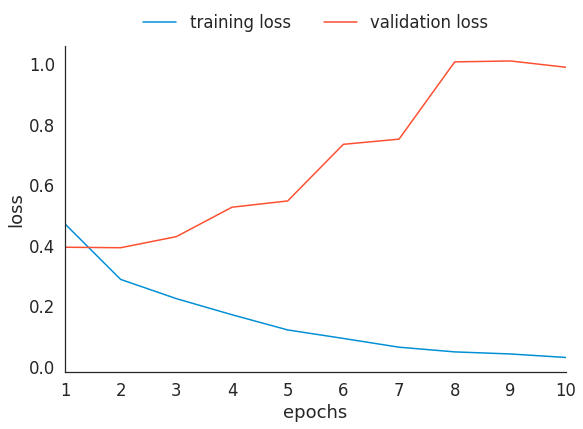

In [25]:
plot_history(history, metrics='loss', val_metrics='val_loss')

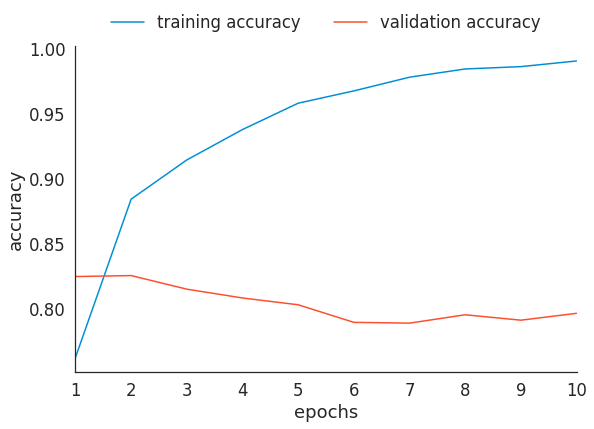

In [26]:
plot_history(history, metrics='accuracy', val_metrics='val_accuracy')

# Model with GRU

## Create Model

In [27]:
embedding_dim = 16
gru_dim = 32

model = tf.keras.Sequential([
                             layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
                             layers.Dense(32, activation='relu'),
                             layers.Dense(1, activation='sigmoid')
])

## Compile

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

## Fit

In [29]:
num_epochs = 10
batch_size = 128

history = model.fit(
    training_padded, training_labels,
    epochs=num_epochs, validation_data=(testing_padded, testing_labels),
    verbose=1
)

Epoch 1/10
782/782 [==============================] - 16s 17ms/step - loss: 0.4736 - accuracy: 0.7587 - val_loss: 0.4007 - val_accuracy: 0.8208
Epoch 2/10
782/782 [==============================] - 13s 16ms/step - loss: 0.2966 - accuracy: 0.8785 - val_loss: 0.4006 - val_accuracy: 0.8246
Epoch 3/10
782/782 [==============================] - 13s 16ms/step - loss: 0.2293 - accuracy: 0.9112 - val_loss: 0.4471 - val_accuracy: 0.8067
Epoch 4/10
782/782 [==============================] - 13s 16ms/step - loss: 0.1709 - accuracy: 0.9361 - val_loss: 0.5299 - val_accuracy: 0.7914
Epoch 5/10
782/782 [==============================] - 13s 16ms/step - loss: 0.1263 - accuracy: 0.9546 - val_loss: 0.6437 - val_accuracy: 0.7981
Epoch 6/10
782/782 [==============================] - 13s 16ms/step - loss: 0.0869 - accuracy: 0.9707 - val_loss: 0.7257 - val_accuracy: 0.7959
Epoch 7/10
782/782 [==============================] - 13s 16ms/step - loss: 0.0621 - accuracy: 0.9791 - val_loss: 0.8522 - val_accuracy:

## History

It's clearly overfitting, but I will keep it as it is (at least for now)

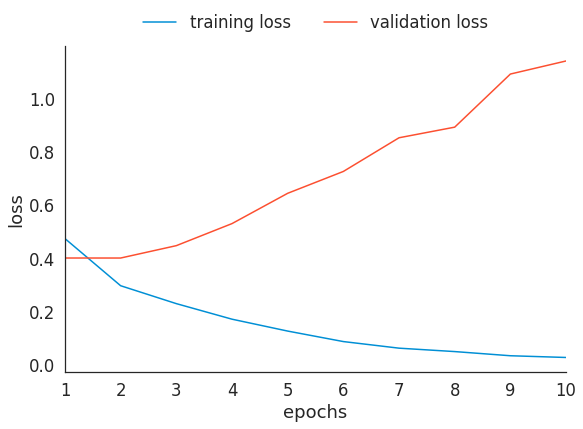

In [30]:
plot_history(history, metrics='loss', val_metrics='val_loss')

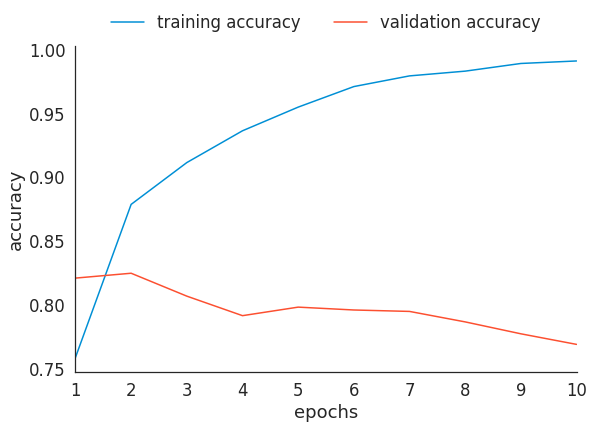

In [31]:
plot_history(history, metrics='accuracy', val_metrics='val_accuracy')

# Model with Conv1D

## Create Model

In [32]:
embedding_dim = 16
filters = 128
kernel_size = 5

model = tf.keras.Sequential([
                             layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             layers.Conv1D(filters, kernel_size, activation='relu'),
                             layers.GlobalAveragePooling1D(),
                             layers.Dense(32, activation='relu'),
                             layers.Dense(1, activation='sigmoid')
])

## Compile

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

## Fit

In [34]:
num_epochs = 10
batch_size = 128

history = model.fit(
    training_padded, training_labels,
    epochs=num_epochs, validation_data=(testing_padded, testing_labels),
    verbose=1
)

Epoch 1/10
782/782 [==============================] - 13s 8ms/step - loss: 0.4312 - accuracy: 0.7935 - val_loss: 0.4192 - val_accuracy: 0.8089
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2761 - accuracy: 0.8881 - val_loss: 0.3938 - val_accuracy: 0.8260
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2192 - accuracy: 0.9167 - val_loss: 0.4329 - val_accuracy: 0.8173
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.1759 - accuracy: 0.9364 - val_loss: 0.4873 - val_accuracy: 0.8122
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.1404 - accuracy: 0.9526 - val_loss: 0.5385 - val_accuracy: 0.8080
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1111 - accuracy: 0.9630 - val_loss: 0.6483 - val_accuracy: 0.8055
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0849 - accuracy: 0.9742 - val_loss: 0.7045 - val_accuracy: 0.8030
Epoch

## History

It's clearly overfitting, but I will keep it as it is (at least for now)

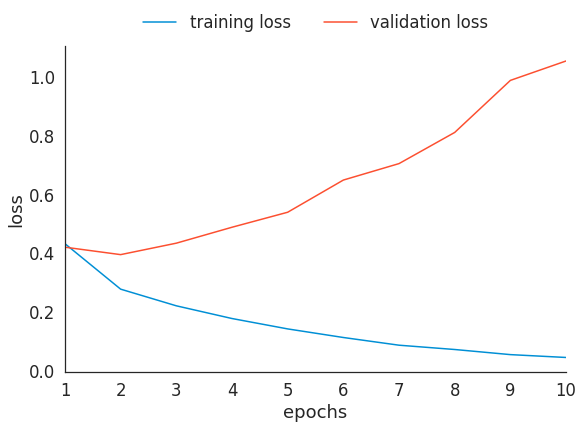

In [35]:
plot_history(history, metrics='loss', val_metrics='val_loss')

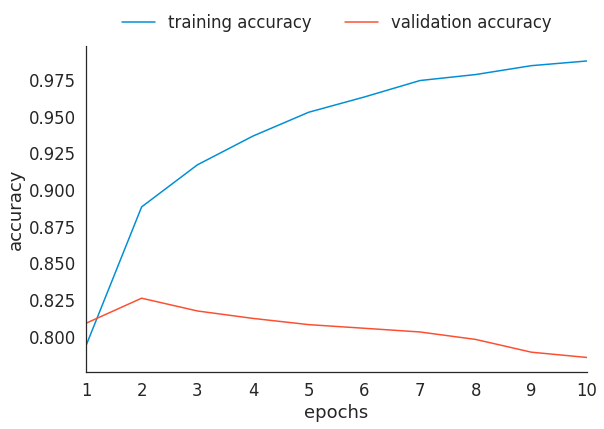

In [36]:
plot_history(history, metrics='accuracy', val_metrics='val_accuracy')